In [2]:
import numpy as np

Задача 1. Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.

In [44]:
a = np.random.random((10, 3))

print(a[np.arange(10), np.argmin(np.abs(a - 0.5), axis = 1)])

[0.39342578 0.10310365 0.26895784 0.53801671 0.49001355 0.82451588
 0.59910588 0.80802779 0.54137    0.8082932 ]


Задача 2. Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.

In [6]:
a = np.random.random((6, 6))

print(np.sum(a, axis = 1)/np.min(a, axis = 0))

[ 29.10397166  16.08238767   8.15895841 106.90785235   6.4635367
  13.2873104 ]


Задача 3. На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.

In [7]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

mask = x == 0
print(np.max(x[1:][mask[:-1]]))

5


Задача 4. Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. В случае, если некоторый индекс встретился в массиве i несколько раз, прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.

In [8]:
x = np.ones((10), dtype=np.int16) 
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])

print(x + np.bincount(i, None, len(x)))

[2 2 2 2 1 4 1 1 2 1]


Задача 5. Реализация kmeans и функционирование Elbow Method

In [27]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [28]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:5] 

array([['0001', 'Male', '19', '15', '39'],
       ['0002', 'Male', '21', '15', '81'],
       ['0003', 'Female', '20', '16', '6'],
       ['0004', 'Female', '23', '16', '77'],
       ['0005', 'Female', '31', '17', '40']], dtype=object)

In [29]:
data[:, 1] = data[:, 1] == 'Male' 
data = data.astype(float)
data[:5] 

array([[ 1.,  1., 19., 15., 39.],
       [ 2.,  1., 21., 15., 81.],
       [ 3.,  0., 20., 16.,  6.],
       [ 4.,  0., 23., 16., 77.],
       [ 5.,  0., 31., 17., 40.]])

In [30]:
def standardization(data): 
    mean = data.mean(axis=0)
    std = data.std(axis=0)
    return (data - mean)/std 

In [31]:
standardized = standardization(data[:,2:])
print(standardized[:5])

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


Подзадача 1, возраст-доход

In [33]:
data = standardized[:,[0,1]]

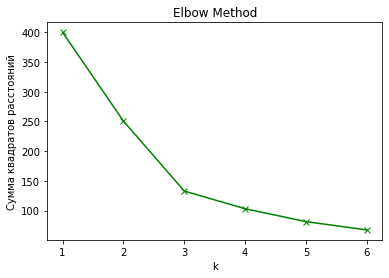

In [34]:
Sum_of_squared_distances = []
K = range(1,7)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)  
plt.plot(K, Sum_of_squared_distances, 'bx-', c='green')
plt.xlabel('k')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Elbow Method')
plt.show() 

Возьмем k = 3

Text(0, 0.5, 'Доход(standardized)')

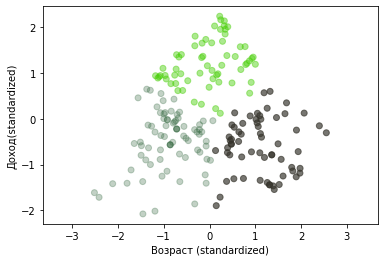

In [35]:
k = 3 
kmeans = KMeans(n_clusters=k).fit(data) 

pca = PCA(n_components = 2); 
pca.fit(data) 

data = pca.transform(data)
#print(data.shape) 

colors = np.random.randint(0, 255, size=(k,4))/255
c_arr = np.array(list(map(lambda x: colors[x], list(kmeans.labels_)))) 

plt.scatter(data[:, 0], data[:, 1], c=c_arr) 

plt.axis('equal')
plt.xlabel("Возраст (standardized)")
plt.ylabel('Доход(standardized)')

Разбиение на 3 кластера соответствует трем "возрастам" (детсво, зрелость, старость), причем доходы первой и третьей группы примерно равны и значительно меньше дохода второй группы

Подзадача 2, возраст-индекс

In [36]:
data = standardized[:,[0,2]] 

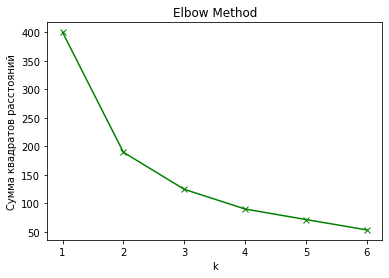

In [37]:
Sum_of_squared_distances = []
K = range(1,7)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_) 
    
plt.plot(K, Sum_of_squared_distances, 'bx-', c='green')
plt.xlabel('k')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Elbow Method')
plt.show() 

Возьмем k = 2

Text(0, 0.5, 'Индекс (standardized)')

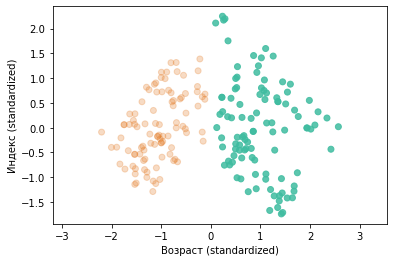

In [39]:
k = 2 
kmeans = KMeans(n_clusters=k).fit(data) 

pca = PCA(n_components = 2); 
pca.fit(data) 

data = pca.transform(data)
#print(data.shape) 

colors = np.random.randint(0, 255, size=(k,4))/255
c_arr = np.array(list(map(lambda x: colors[x], list(kmeans.labels_)))) 

plt.scatter(data[:, 0], data[:, 1], c=c_arr) 

plt.axis('equal')
plt.xlabel("Возраст (standardized)")
plt.ylabel('Индекс (standardized)') 

Разбиение на 2 кластера симметрично, причем отчетливо виден график нормального распределения

Подзадача 3, доход-индекс

In [40]:
data = standardized[:,[1,2]] 

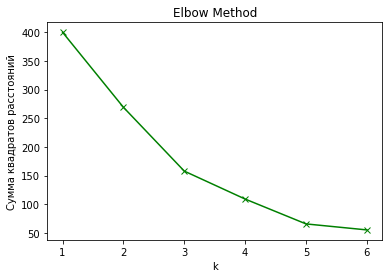

In [41]:
Sum_of_squared_distances = []
K = range(1,7)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_) 
    
plt.plot(K, Sum_of_squared_distances, 'bx-', c='green')
plt.xlabel('k')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Elbow Method')
plt.show() 

Возьмем k = 5

Text(0, 0.5, 'Индекс (standardized)')

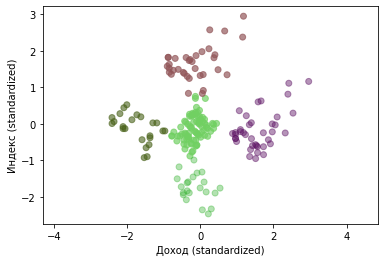

In [43]:
k = 5 
kmeans = KMeans(n_clusters=k).fit(data) 

pca = PCA(n_components = 2); 
pca.fit(data) 

data = pca.transform(data)
#print(data.shape) 

colors = np.random.randint(0, 255, size=(k,4))/255
c_arr = np.array(list(map(lambda x: colors[x], list(kmeans.labels_)))) 

plt.scatter(data[:, 0], data[:, 1], c=c_arr) 

plt.axis('equal')
plt.xlabel("Доход (standardized)")
plt.ylabel('Индекс (standardized)')

Разбиение на 5 кластеров симметрично, причем наибольший из них состоит из людей со средним доходом и индексом